## Parte 1

Crea una función que genere dos muestras que se distribuyen según dos gaussianas distintas. 

La función recibirá como valores de entrada: el número N de puntos a generar para cada categoría, y $\mu_1$, $\sigma_1$, $\mu_2$, $\sigma_2$ que son los correspondientes parámetros de las dos gaussianas. 

Como output devolverá un valor con longitud 2N que contenga la muestra 'x' generada, y otro vector de longitud 2N que contenga 0 o 1 en función de la categoría asociada a ese elemento.

In [5]:
two.gauss <- function(n.points, mu.1, sigma.1, mu.2, sigma.2){
    gauss.1 <- rnorm(n.points,mu.1,sigma.1)
    gauss.2 <- rnorm(n.points,mu.2,sigma.2)
    x <- c(gauss.1, gauss.2)
    y <- c(rep(0, n.points),rep(1, n.points))
    my.output <- data.frame(x,y)
    return(my.output)
}
#a <- two.gauss(10,2,1,6,1)
#a$x
#a$y

## Parte 2

Crea una función que calcule el valor de la sigmoide para un valor de entrada Z. 

In [6]:
my.sigmoid <- function(z){
    sigm <- 1. / (1 + exp(-z))   
    return(sigm)
}

## Parte 3

Crea una función que calcule el valor de la función de Loss y que reciba como entrada 'x' e 'y' y los parámetros del modelo que vamos a asumir: 

$z = a + bx$ 

(es decir, a y b). 

In [8]:
my.loss <- function(intercept, ang.coeff, vec.x, vec.y){
    sigm <- my.sigmoid(intercept + ang.coeff*vec.x)
    loss <- (vec.y * log(sigm)) + (1 - vec.y)*log(1 - sigm)
    return(-sum(loss)/length(vec.x))
}

#my.loss(2,3,a$x,a$y)

## Parte 4

Crea una función que devuelva el gradiente de la función de Loss y que reciba como entrada 'x' e 'y' y los parámetros (a, b) del modelo que vamos a asumir.

In [9]:
my.grad <- function(intercept, ang.coeff, vec.x, vec.y){
    sigm <- my.sigmoid(intercept + ang.coeff*vec.x)
    common.grad <- (sigm - vec.y)
    grad.a <- sum(common.grad)/length(vec.x)
    grad.b <- (sum(common.grad * vec.x))/length(vec.x)
    grad <- rbind(grad.a,grad.b)
    return(grad)
}

## Parte 5

Generar un par de vectores 'x', 'y' con: 
- N = 100; 
- $\mu_1$ = 2
- $\mu_2$ = 6
- $\sigma_1$ = 1 
- $\sigma_2$ = 1 

In [10]:
# Definimos los parametros
N = 100
mu1 = 2
mu2 = 6
sigma1 = 1
sigma2 = 1

In [12]:
my.df <- two.gauss(N, mu1, sigma1, mu2, sigma2)
my.x <- my.df$x
my.y <- my.df$y

## Parte 6

Calcular la función de coste y el gradiente para: 
- a = 0
- b = 0. 

Actualizar los valores de a y b de manera que 

$(a, b)_{nuevos} = (a, b)_{viejos} + \lambda \times \nabla Loss$

Repite tres o cuatro veces y observa los valores de la función de coste. 

Intenta encontrar el mínimo aproximadadamente. Interpreta los resultados.

In [13]:
# Defino lambda (qué valor es el mejor que puedo elegir?)
lambda = 0.2

In [21]:
loss.in.zero <- my.loss(0, 0, my.x, my.y)
loss.in.zero

[1] 0,6931472

In [15]:
grad.in.zero <- my.grad(0, 0, my.x, my.y)
grad.in.zero

grad.a,0.000000
grad.b,-1.030067


Ok, ahora hacemos un loop

In [20]:
# Empezamos por a = 0, b = 0

a = 0
b = 0

n.epoch <- 10

for(i in 1:n.epoch){
    loss <- my.loss(a, b, my.x, my.y)
    grad <- my.grad(a, b, my.x, my.y)
    a = a - lambda * grad[1]
    b = b - lambda * grad[2]
}

print(paste("After", n.epoch, "iterations, the best values of a and b are",a,b))
print(paste("Here, the Loss function value is",loss))

[1] "After 10 iterations, the best values of a and b are -0,325939367908242 0,273709361500818"
[1] "Here, the Loss function value is 0,53370657145851"


Let's plot the points and the line obtained with the linear regression.

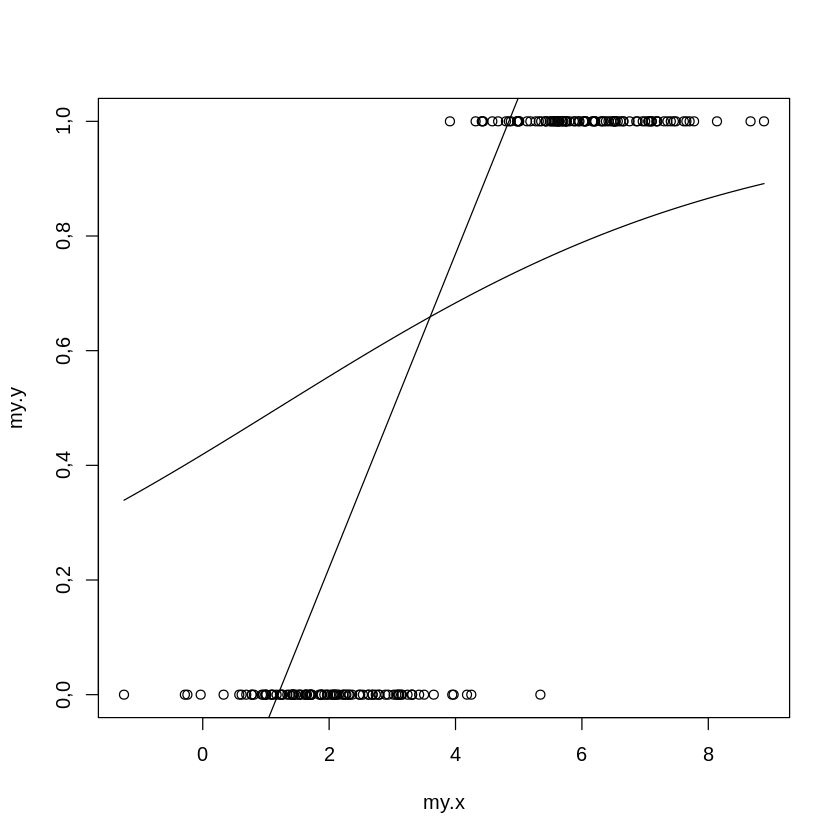

In [18]:
plot(my.x, my.y)
abline(a,b)
curve(my.sigmoid(a+b*x), add = T)